# Chapter 3

## Non-linear transformations of the predictors

We can extend our linear fitting capabilities by e.g fitting to an X^2 term `y ~ B_0 + B_1*x + B_2*x^2`

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.set(style="whitegrid")

In [2]:
boston = sm.datasets.get_rdataset("Boston", "MASS").data

In [3]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
# Here we use the beefier "statsmodels" package to do the analysis that R would 
# do for us, giving the errors, t-values, p-values, etc.

# statsmodels doesn't assume there'll be an intercept, so you have to add one
X_train =  sm.add_constant(boston)

# the below formula is a regression on lstat, including an lstat^2 term  
model = smf.ols('medv ~ lstat + np.square(lstat)', data=boston) # == lstat+age+lstat:age
results = model.fit()
print(results.summary())
# p-value for F-statistic and p-value for lstat^2 term both tiny, suggesting this is a valid inclusion


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 13 May 2019   Prob (F-statistic):          1.56e-112
Time:                        20:16:24   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872  

/home/wpg/.local/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


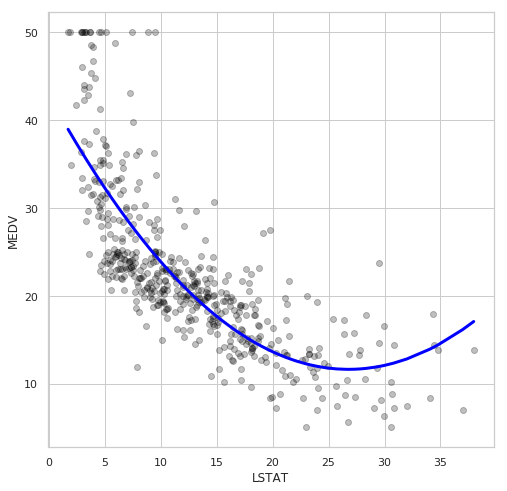

In [5]:

B0, B1, B2 = results.params

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(boston.lstat, boston.medv,  color='black', alpha=0.25)
fitted_data = zip(boston.lstat, B0+boston.lstat*B1 + np.square(boston.lstat)*B2)
fitted_data = sorted(fitted_data, key=lambda x: x[0])
x,y = zip(*fitted_data)
plt.plot(x, y, color='blue', linewidth=3)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()